In [6]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
import pandas as pd

# Wine Review Dataset

The wine review is a well known dataset for experimentation and example purposes. 
    You can download the dataset from kaggle: [https://www.kaggle.com/zynicide/wine-reviews](https://www.kaggle.com/zynicide/wine-reviews)

In [11]:
df = pd.read_csv('data/winemag-data-130k-v2.csv').drop('Unnamed: 0', axis=1)
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


## Built-in hooks to plotting libraries like matplotlib

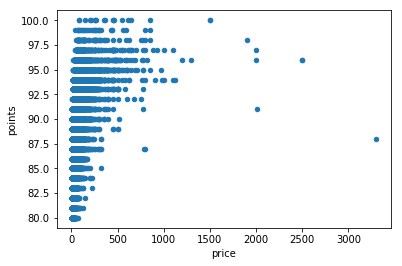

In [17]:
df.plot.scatter(y='points', x='price')

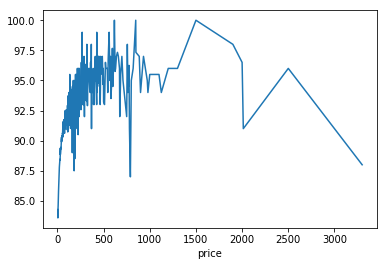

In [16]:
df.groupby('price').points.mean().plot()

## Sometimes similar to SQL

For example: get me all reviews without a country, and their reviewers.

In [25]:
reviews = df.loc[df.country.isna(), :]
reviewers = reviews.taster_twitter_handle.unique()

print('Reviewers', reviewers.tolist(), '\n')
reviews.head()

Reviewers ['@worldwineguys', '@vossroger', '@suskostrzewa', '@wineschach', '@laurbuzz', '@JoeCz', '@AnneInVino', '@paulgwine\xa0'] 



,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
913,NaN,"Amber in color, this wine has aromas of peach ...",Asureti Valley,87,30.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Gotsa Family Wines 2014 Asureti Valley Chinuri,Chinuri,Gotsa Family Wines
3131,NaN,"Soft, fruity and juicy, this is a pleasant, si...",Partager,83,NaN,NaN,NaN,NaN,Roger Voss,@vossroger,Barton & Guestier NV Partager Red,Red Blend,Barton & Guestier
4243,NaN,"Violet-red in color, this semisweet wine has a...",Red Naturally Semi-Sweet,88,18.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Kakhetia Traditional Winemaking 2012 Red Natur...,Ojaleshi,Kakhetia Traditional Winemaking
9509,NaN,This mouthwatering blend starts with a nose of...,Theopetra Malagouzia-Assyrtiko,92,28.0,NaN,NaN,NaN,Susan Kostrzewa,@suskostrzewa,Tsililis 2015 Theopetra Malagouzia-Assyrtiko W...,White Blend,Tsililis
9750,NaN,This orange-style wine has a cloudy yellow-gol...,Orange Nikolaevo Vineyard,89,28.0,NaN,NaN,NaN,Jeff Jenssen,@worldwineguys,Ross-idi 2015 Orange Nikolaevo Vineyard Chardo...,Chardonnay,Ross-idi


## How many reviews did each of them write?

In [28]:
df.loc[df.country.isna(), :].groupby('taster_twitter_handle').size().sort_values()

taster_twitter_handle
@paulgwine         1
@JoeCz             2
@vossroger         2
@laurbuzz          3
@suskostrzewa      5
@wineschach        7
@AnneInVino        9
@worldwineguys    34
dtype: int64

# Datatypes
Built-in support for a range of datatypes:
1. Datetimes - accessed through `.dt`
2. categorical values - accessed through `.cat`
3. ordinal values (categorical with an order)
4. string - accessed through `.str`
5. Numeric

Allows for special functionality and optimized operations. 

## Datetime

Let's create a sample with 1000 reviews, where we add a date. 
We take the first 1000 rows and add 1000 days starting from 2018. 

In [38]:
df_1000 = df.iloc[:1000, :].copy()
df_1000['datetime'] = pd.date_range('2018-06-01', periods=1000, freq='d')
df_1000.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,datetime
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2018-06-01
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2018-06-02
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2018-06-03
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2018-06-04
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2018-06-05


Calculate the average rating per month of the year. 

In [57]:
df_1000.groupby(
    [
        df_1000['datetime'].dt.year, 
        df_1000['datetime'].dt.month
    ]
)['points'].mean().head(20)

datetime  datetime
2018      6           86.966667
          7           85.741935
          8           86.193548
          9           87.800000
          10          90.870968
          11          90.100000
          12          88.838710
2019      1           87.096774
          2           87.714286
          3           89.870968
          4           86.366667
          5           91.290323
          6           88.133333
          7           85.967742
          8           89.580645
          9           90.666667
          10          88.161290
          11          91.600000
          12          91.709677
2020      1           88.290323
Name: points, dtype: float64

## Categories
Let's make country a category. 

In [54]:
df_1000['country'] = df_1000['country'].astype('category')
df_1000['country'].cat.categories

Index(['Argentina', 'Australia', 'Austria', 'Canada', 'Chile', 'France',
       'Germany', 'Greece', 'Hungary', 'Israel', 'Italy', 'Mexico',
       'New Zealand', 'Portugal', 'Romania', 'South Africa', 'Spain', 'US'],
      dtype='object')

In [56]:
df_1000['country'].cat.add_categories(['Netherlands'])

0          Italy
1       Portugal
2             US
3             US
4             US
         ...    
995        Italy
996        Italy
997    Australia
998           US
999           US
Name: country, Length: 1000, dtype: category
Categories (19, object): ['Argentina', 'Australia', 'Austria', 'Canada', ..., 'South Africa', 'Spain', 'US', 'Netherlands']